# Get Uniprot IDS for hepc
## Christian Roncal Cmsc499a Dr. Leiserson

In [1]:
import os 
import pandas as pd
import numpy as np
from utils import *
import re

In [2]:
os.listdir()

['full_train.csv',
 'make_matrix.py',
 'fullmatrix_getprots.ipynb',
 'utils.py',
 'hepatitis_c_processing.ipynb',
 'hepc_interactions_full.csv',
 'dataprocessing_playground.ipynb',
 'ebola_interactions_full.csv',
 'makesingletasks.ipynb',
 'classes.pkl',
 'influenza',
 'ebola',
 'influenza_a_processing-Copy1.ipynb',
 'flustrains.txt',
 '.ipynb_checkpoints',
 'flu_interactions_full.csv',
 'D.pkl',
 'hepc',
 '__pycache__',
 'hepc.fasta',
 'uniprots',
 'ebola_processing.ipynb',
 'conjoint_featurizer_playground.ipynb']

# 1 load data

In [3]:
hepccsv = './hepc/hepc_phi.csv'

In [4]:
fix_and_save_csv(hepccsv)

In [5]:
hepcdf = pd.read_csv(hepccsv, index_col=0)

In [6]:
hepcdf.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Pathogen,Taxonomy ID,virusUprot,Pathogen Protein,humanUprot,Human Protein,Experimental Method,Pubmed ID
0,0,0,0,0,0,0,0,Human papillomavirus TYPE 16 (HPV 16),333760,P03129,VE7_HPV16,Q14978,NOLC1_HUMAN,affinity chromatography technology,16061792
1,1,1,1,1,1,1,1,Hepatitis C virus,11103,O39474,O39474_9HEPC,Q07812,BAX_HUMAN,anti bait coimmunoprecipitation,12925958
2,2,2,2,2,2,2,2,Hepatitis C virus,11103,O39474,O39474_9HEPC,P62993,GRB2_HUMAN,anti bait coimmunoprecipitation,10318918
3,3,3,3,3,3,3,3,Hepatitis C virus,11103,O39474,O39474_9HEPC,P08631,HCK_HUMAN,anti bait coimmunoprecipitation,14993658
4,4,4,4,4,4,4,4,Hepatitis C virus,11103,O39474,O39474_9HEPC,P06239,LCK_HUMAN,anti bait coimmunoprecipitation,14993658


In [7]:
len(hepcdf['Pathogen'].unique()) #not all of this will be of interest

535

# 2 Extract relevant strains

Use regex to get strains we're interested in: H1N1|H3N2|H5N1|H7N3

In [8]:
regex = 'Hepatitis C'
hepcdf = regex_select(hepcdf, 'Pathogen', regex)

Pathogen Hepatitis C


In [9]:
hepcdf.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Pathogen,Taxonomy ID,virusUprot,Pathogen Protein,humanUprot,Human Protein,Experimental Method,Pubmed ID
1,1,1,1,1,1,1,1,Hepatitis C virus,11103,O39474,O39474_9HEPC,Q07812,BAX_HUMAN,anti bait coimmunoprecipitation,12925958
2,2,2,2,2,2,2,2,Hepatitis C virus,11103,O39474,O39474_9HEPC,P62993,GRB2_HUMAN,anti bait coimmunoprecipitation,10318918
3,3,3,3,3,3,3,3,Hepatitis C virus,11103,O39474,O39474_9HEPC,P08631,HCK_HUMAN,anti bait coimmunoprecipitation,14993658
4,4,4,4,4,4,4,4,Hepatitis C virus,11103,O39474,O39474_9HEPC,P06239,LCK_HUMAN,anti bait coimmunoprecipitation,14993658
5,5,5,5,5,5,5,5,Hepatitis C virus,11103,O39474,O39474_9HEPC,P06241,FYN_HUMAN,anti bait coimmunoprecipitation,14993658


In [10]:
len(hepcdf['Pathogen'].unique())

15

# 3 Get virus|human uniprots of interactions

get a df with cols virus uniprot and human uniprot for matrix interaction processing.

In [11]:
# drop cols we don't need
hepcdf = removeObsoletes(hepcdf[['virusUprot', 'humanUprot']])

In [12]:
hepcdf.head()

,virusUprot,humanUprot
1,O39474,Q07812
2,O39474,P62993
3,O39474,P08631
4,O39474,P06239
5,O39474,P06241


In [13]:
# save current interaction matrix
hepcdf.to_csv('hepc_interactions_full.csv', index=False)

In [14]:
pd.read_csv('hepc_interactions_full.csv').head()

,virusUprot,humanUprot
0,O39474,Q07812
1,O39474,P62993
2,O39474,P08631
3,O39474,P06239
4,O39474,P06241


# rank

In [15]:
ranked_hepcdf = rank_by_interactions(hepcdf, 5)

In [19]:
ranked_hepcdf

,virus,n_pos,n_neg,ratio
0,Q9WMX2,497,505,0.496008
1,Q99IB8,349,653,0.348303
2,P27958,227,775,0.226547
3,Q6QZG4,25,977,0.024950
4,Q03463,17,985,0.016966
5,O39474,17,985,0.016966
6,P0C045,17,985,0.016966
7,O92972,10,992,0.009980
8,P26663,8,994,0.007984
9,B8Y460,8,994,0.007984


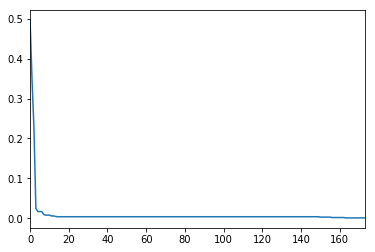

In [17]:
ranked_hepcdf['ratio'].plot.line()

In [18]:
ranked_hepcdf['ratio'].mean()

0.010249615711106599

In [36]:
hepc10 = ranked_hepcdf[:11]

In [37]:
hepc10['ratio'].mean()

0.10733079295953546

In [40]:
hepcdf.loc[hepcdf['virusUprot'] == hepc10['virus']]

ValueError: Can only compare identically-labeled Series objects